<a href="https://colab.research.google.com/github/Wolverine-Shiva/Web-Scraping-www.JustWatch.com/blob/main/Web_Scraping_assign_for_Numerical_Prog_in_Python_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np


## **Scrapping Movies Data**

In [ ]:
# Set up for running selenium in Google Colab
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
CHROME_DRIVER_VERSION=`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`
wget -N https://chromedriver.storage.googleapis.com/$CHROME_DRIVER_VERSION/chromedriver_linux64.zip -P /tmp/
unzip -o /tmp/chromedriver_linux64.zip -d /tmp/
chmod +x /tmp/chromedriver
mv /tmp/chromedriver /usr/local/bin/chromedriver
pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,070 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,796 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,463 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:13 https://ppa.launchpadconte

In [ ]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()


'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/121/chromedriver'

In [ ]:
# set the target URL
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
driver.get(url )

In [ ]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="abd5ceaad08596c73127ad908efd76f1")>

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [ ]:
title_list = driver.find_elements(By.XPATH,"//a[@class='title-list-grid__item--link']")
title_list

[<selenium.webdriver.remote.webelement.WebElement (session="1829791a845751c165202eeb54e56ae6", element="B853E1CB7D3CF1178E483949D47F2DCF_element_20")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1829791a845751c165202eeb54e56ae6", element="B853E1CB7D3CF1178E483949D47F2DCF_element_21")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1829791a845751c165202eeb54e56ae6", element="B853E1CB7D3CF1178E483949D47F2DCF_element_22")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1829791a845751c165202eeb54e56ae6", element="B853E1CB7D3CF1178E483949D47F2DCF_element_23")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1829791a845751c165202eeb54e56ae6", element="B853E1CB7D3CF1178E483949D47F2DCF_element_24")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1829791a845751c165202eeb54e56ae6", element="B853E1CB7D3CF1178E483949D47F2DCF_element_25")>,
 <selenium.webdriver.remote.webelement.WebElement (session="1829791a845751c165202eeb54e5

## **Fetching Movie URL's**

In [ ]:
# write your code here
movies=[]
for i in title_list:
    name=i.get_attribute('href')
    movies.append(name)
movies

['https://www.justwatch.com/in/movie/salaar',
 'https://www.justwatch.com/in/movie/animal-2022',
 'https://www.justwatch.com/in/movie/12th-fail',
 'https://www.justwatch.com/in/movie/sam-bahadur',
 'https://www.justwatch.com/in/movie/dunki',
 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom',
 'https://www.justwatch.com/in/movie/ssmb-28',
 'https://www.justwatch.com/in/movie/the-kerala-story',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/neru',
 'https://www.justwatch.com/in/movie/captain-miller',
 'https://www.justwatch.com/in/movie/fighter-2022',
 'https://www.justwatch.com/in/movie/sapta-sagaradaache-ello-side-b',
 'https://www.justwatch.com/in/movie/the-marvels',
 'https://www.justwatch.com/in/movie/ayalaan',
 'https://www.justwatch.com/in/movie/dune-2021',
 'https://www.justwatch.com/in/movie/nani30',
 'https://www.justwat

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
def extract_movie_name_from_url(url):
    return url.split('/')[-1]

# Extract movie names from the URLs
movie_names = [extract_movie_name_from_url(url) for url in movies]


In [ ]:
movie_names

['salaar',
 'animal-2022',
 '12th-fail',
 'sam-bahadur',
 'dunki',
 'aquaman-and-the-lost-kingdom',
 'ssmb-28',
 'the-kerala-story',
 'anyone-but-you',
 'oppenheimer',
 'hanu-man',
 'neru',
 'captain-miller',
 'fighter-2022',
 'sapta-sagaradaache-ello-side-b',
 'the-marvels',
 'ayalaan',
 'dune-2021',
 'nani30',
 'migration',
 'the-beekeeper-2024',
 'jawan',
 'killers-of-the-flower-moon',
 'anatomie-dune-chute',
 'parking-2023',
 'society-of-the-snow',
 'mission-impossible-7',
 'guthlee-ladoo',
 'tiger-3',
 'saindhav',
 'barbie-2023',
 'bhakshak',
 'poor-things',
 'joram',
 'joe-2023',
 'past-lives',
 'pindam',
 'interstellar',
 '365-days',
 'talk-to-me-2022',
 'wonka',
 'saltburn',
 'upgraded',
 'devil-2023',
 'lift-0',
 '777-charlie',
 'blue-beetle',
 'dada-2023',
 'the-holdovers',
 'badland-hunters',
 'kaathal-the-core',
 'harry-potter-and-the-philosophers-stone',
 'uri-the-surgical-strike',
 'the-wolf-of-wall-street',
 'zara-hatke-zara-bach-ke',
 'leo-2023',
 'yaariyan-2',
 'warnin

## **Scrapping release Year**

In [ ]:
# Write Your Code here
Release_year=[]
for movie_url in movies:
    driver.get(movie_url)

    try:
        # Find the release year element
        release_year_element = driver.find_element(By.XPATH, "//span[@class='text-muted']")
        release_year = release_year_element.text.strip("()")
    except:
        release_year = "Release Year not found"
    Release_year.append({"Movie URL": movie_url, "Release Year": release_year})

for cur_movie in Release_year:
  print(cur_movie)

{'Movie URL': 'https://www.justwatch.com/in/movie/salaar', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/animal-2022', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/12th-fail', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/sam-bahadur', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/dunki', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/ssmb-28', 'Release Year': '2024'}
{'Movie URL': 'https://www.justwatch.com/in/movie/the-kerala-story', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/anyone-but-you', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/oppenheimer', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/hanu-man', 'Release Year': '2024'}
{'Movie URL': 'https://www.

In [ ]:
# Extract release years from the Release_year list
movie_release_years = [year["Release Year"] for year in Release_year]


In [ ]:
movie_release_years

['2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2024',
 '2024',
 '2023',
 '2023',
 '2024',
 '2021',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2014',
 '2020',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2024',
 '2022',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2001',
 '2019',
 '2013',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2010',
 '2023',
 '2024',
 '2019',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2024',
 '2023',
 '2023',
 '2023',
 '2009',
 '2011',
 '2024',
 '2023',
 '2016',
 '2023',
 '2006',
 '2018',
 'Release Year not found',
 '2023',
 '2023',
 '2017',
 '2018',
 '2023',
 '2023',
 '2018',
 'Release Year not found',
 '2016']

## **Scrapping Genres**

In [ ]:
# Write Your Code here
#scrapping genre
def fetch_genre(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the genres using the provided XPath expression
        genres_heading = soup.find('h3', class_='detail-infos__subheading', text='Genres')
        if genres_heading:
            genres_element = genres_heading.find_next_sibling('div', class_='detail-infos__value')
            genres = genres_element.text.strip()

            # Split the genres into a list
            genres_list = [genre.strip() for genre in genres.split(',')]
            return genres_list
    return None

# Fetch genres for each URL in 'movies' and store in a new list 'all_genres'
movie_genres = []

for movie_url in movies:
    genres = fetch_genre(movie_url)
    if genres:
        movie_genres.extend(genres)

# Print the list of all genres
print(movie_genres)

<ipython-input-15-12b43fca39db>:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  genres_heading = soup.find('h3', class_='detail-infos__subheading', text='Genres')


['Mystery & Thriller', 'Action & Adventure', 'Crime', 'Drama', 'Action & Adventure', 'Drama', 'Crime', 'Mystery & Thriller', 'Drama', 'Drama', 'War & Military', 'History', 'Comedy', 'Drama', 'Action & Adventure', 'Fantasy', 'Science-Fiction', 'Drama', 'Kids & Family', 'Action & Adventure', 'Drama', 'Comedy', 'Romance', 'Drama', 'History', 'Comedy', 'Fantasy', 'Action & Adventure', 'Drama', 'Mystery & Thriller', 'Action & Adventure', 'Drama', 'Mystery & Thriller', 'Mystery & Thriller', 'Action & Adventure', 'War & Military', 'Action & Adventure', 'Drama', 'Romance', 'Science-Fiction', 'Action & Adventure', 'Fantasy', 'Action & Adventure', 'Science-Fiction', 'Science-Fiction', 'Drama', 'Action & Adventure', 'Drama', 'Romance', 'Kids & Family', 'Comedy', 'Kids & Family', 'Animation', 'Drama', 'Mystery & Thriller', 'Action & Adventure', 'Action & Adventure', 'Mystery & Thriller', 'Crime', 'History', 'Drama', 'Romance', 'Western', 'Crime', 'Drama', 'Mystery & Thriller', 'Mystery & Thriller'

In [ ]:
movie_genres

['Mystery & Thriller',
 'Action & Adventure',
 'Crime',
 'Drama',
 'Action & Adventure',
 'Drama',
 'Crime',
 'Mystery & Thriller',
 'Drama',
 'Drama',
 'War & Military',
 'History',
 'Comedy',
 'Drama',
 'Action & Adventure',
 'Fantasy',
 'Science-Fiction',
 'Drama',
 'Kids & Family',
 'Action & Adventure',
 'Drama',
 'Comedy',
 'Romance',
 'Drama',
 'History',
 'Comedy',
 'Fantasy',
 'Action & Adventure',
 'Drama',
 'Mystery & Thriller',
 'Action & Adventure',
 'Drama',
 'Mystery & Thriller',
 'Mystery & Thriller',
 'Action & Adventure',
 'War & Military',
 'Action & Adventure',
 'Drama',
 'Romance',
 'Science-Fiction',
 'Action & Adventure',
 'Fantasy',
 'Action & Adventure',
 'Science-Fiction',
 'Science-Fiction',
 'Drama',
 'Action & Adventure',
 'Drama',
 'Romance',
 'Kids & Family',
 'Comedy',
 'Kids & Family',
 'Animation',
 'Drama',
 'Mystery & Thriller',
 'Action & Adventure',
 'Action & Adventure',
 'Mystery & Thriller',
 'Crime',
 'History',
 'Drama',
 'Romance',
 'Western'

## **Scrapping IMBD Rating**

In [ ]:
#scrapping imdb rating
def fetch_imdb(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the genres using the provided XPath expression
        imdb_heading = soup.find('h3', class_='detail-infos__subheading', text='Rating')
        if imdb_heading:
            imdb_element = imdb_heading.find_next_sibling('div', class_='detail-infos__value')
            imdb = imdb_element.text.strip()

            # Split the genres into a list
            imdb_list = [imdb.strip() for imdb in imdb.split(',')]
            return imdb_list
    return None

# Fetch genres for each URL in 'movies' and store in a new list 'all_genres'
movie_imdb = []

for movie_url in movies:
    imdb = fetch_imdb(movie_url)
    if imdb:
        movie_imdb.extend(imdb)

<ipython-input-17-fd822162e749>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  imdb_heading = soup.find('h3', class_='detail-infos__subheading', text='Rating')


In [ ]:
movie_imdb

['6.5  (59k)',
 '6.3  (80k)',
 '9.1  (97k)',
 '7.9  (12k)',
 '7.0  (64k)',
 '5.7  (55k)',
 '5.5  (18k)',
 '7.1  (67k)',
 '6.4  (29k)',
 '8.4  (637k)',
 '8.5  (17k)',
 '7.6  (5k)',
 '6.8  (4k)',
 '7.0  (35k)',
 '8.1  (2k)',
 '5.6  (103k)',
 '6.1  (2k)',
 '8.0  (759k)',
 '8.2  (13k)',
 '6.7  (15k)',
 '6.4  (50k)',
 '7.0  (91k)',
 '7.7  (201k)',
 '7.8  (65k)',
 '7.9  (8k)',
 '7.9  (100k)',
 '7.7  (229k)',
 '7.8  (1k)',
 '5.8  (51k)',
 '5.1  (1k)',
 '6.9  (493k)',
 '7.3  (2k)',
 '6.8  (1k)',
 '7.6  (2k)',
 '7.9  (84k)',
 '8.3  (7k)',
 '8.7  (2m)',
 '3.3  (97k)',
 '7.1  (130k)',
 '7.1  (94k)',
 '7.0  (171k)',
 '6.1  (6k)',
 '6.7  (3k)',
 '5.5  (32k)',
 '8.8  (39k)',
 '6.0  (88k)',
 '8.2  (5k)',
 '8.0  (95k)',
 '5.9  (7k)',
 '7.6  (2k)',
 '7.6  (848k)',
 '8.2  (71k)',
 '8.2  (1m)',
 '6.6  (14k)',
 '7.2  (56k)',
 '6.0  (11k)',
 '7.8',
 '8.0  (8k)',
 '5.1  (2k)',
 '7.7  (19k)',
 '6.5  (41k)',
 '6.7  (1k)',
 '8.8  (2m)',
 '8.3  (5k)',
 '7.2  (37k)',
 '6.1  (18k)',
 '7.2',
 '8.3  (43k)',
 '7.0  

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
Provider = []

for movie_url in movies:
    driver.get(movie_url)

    try:
        # Find the provider element
        provider_element = driver.find_element(By.XPATH, "//img[@class='offer__icon']")
        provider_name = provider_element.get_attribute('alt')
    except:
        provider_name = "Provider not found"

    Provider.append({"Movie URL": movie_url, "Provider Name": provider_name})

for stream in Provider:
  print(stream)

{'Movie URL': 'https://www.justwatch.com/in/movie/salaar', 'Provider Name': 'Netflix'}
{'Movie URL': 'https://www.justwatch.com/in/movie/animal-2022', 'Provider Name': 'Netflix'}
{'Movie URL': 'https://www.justwatch.com/in/movie/12th-fail', 'Provider Name': 'Hotstar'}
{'Movie URL': 'https://www.justwatch.com/in/movie/sam-bahadur', 'Provider Name': 'Zee5'}
{'Movie URL': 'https://www.justwatch.com/in/movie/dunki', 'Provider Name': 'Netflix'}
{'Movie URL': 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom', 'Provider Name': 'Apple TV'}
{'Movie URL': 'https://www.justwatch.com/in/movie/ssmb-28', 'Provider Name': 'Netflix'}
{'Movie URL': 'https://www.justwatch.com/in/movie/the-kerala-story', 'Provider Name': 'Zee5'}
{'Movie URL': 'https://www.justwatch.com/in/movie/anyone-but-you', 'Provider Name': 'Bookmyshow'}
{'Movie URL': 'https://www.justwatch.com/in/movie/oppenheimer', 'Provider Name': 'Apple TV'}
{'Movie URL': 'https://www.justwatch.com/in/movie/hanu-man', 'Provider Na

In [ ]:
Movie_streaming = [movie_info['Provider Name'] for movie_info in Provider]


In [ ]:
Movie_streaming

['Netflix',
 'Netflix',
 'Hotstar',
 'Zee5',
 'Netflix',
 'Apple TV',
 'Netflix',
 'Zee5',
 'Bookmyshow',
 'Apple TV',
 'Provider not found',
 'Hotstar',
 'Amazon Prime Video',
 'Provider not found',
 'Amazon Prime Video',
 'Apple TV',
 'Sun Nxt',
 'Apple TV',
 'Netflix',
 'Amazon Video',
 'Bookmyshow',
 'Apple TV',
 'Apple TV Plus',
 'Provider not found',
 'Hotstar',
 'Netflix',
 'Apple TV',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Apple TV',
 'Netflix',
 'Provider not found',
 'Amazon Video',
 'Provider not found',
 'Lionsgate Play',
 'Amazon Prime Video',
 'Apple TV',
 'Netflix',
 'Apple TV',
 'Provider not found',
 'Provider not found',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Netflix',
 'Voot',
 'Apple TV',
 'Amazon Prime Video',
 'Bookmyshow',
 'Netflix',
 'Amazon Prime Video',
 'Apple TV',
 'Zee5',
 'Lionsgate Play',
 'Provider not found',
 'Netflix',
 'Provider not found',
 'Provider not found',
 'Amazon Prime Video',
 'Hotstar',
 'Provider 

In [ ]:
movies

['https://www.justwatch.com/in/movie/salaar',
 'https://www.justwatch.com/in/movie/animal-2022',
 'https://www.justwatch.com/in/movie/12th-fail',
 'https://www.justwatch.com/in/movie/sam-bahadur',
 'https://www.justwatch.com/in/movie/dunki',
 'https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom',
 'https://www.justwatch.com/in/movie/ssmb-28',
 'https://www.justwatch.com/in/movie/the-kerala-story',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/neru',
 'https://www.justwatch.com/in/movie/captain-miller',
 'https://www.justwatch.com/in/movie/fighter-2022',
 'https://www.justwatch.com/in/movie/sapta-sagaradaache-ello-side-b',
 'https://www.justwatch.com/in/movie/the-marvels',
 'https://www.justwatch.com/in/movie/ayalaan',
 'https://www.justwatch.com/in/movie/dune-2021',
 'https://www.justwatch.com/in/movie/nani30',
 'https://www.justwat

In [ ]:
driver.quit()

## **Now Creating Movies DataFrame**

In [ ]:
print(len(movie_names))
print(len(movie_release_years))
print(len(movie_genres))
print(len(movies))
print(len(movie_imdb))
print(len(Movie_streaming))

100
100
281
100
99
100


In [ ]:
#Creatind datafame of scrapped movie data
import pandas as pd
Movies_data=pd.DataFrame()
Movies_data['Movie Names']=movie_names[:80]
Movies_data['Release Year']=movie_release_years[:80]
Movies_data['Movie Genres']=movie_genres[:80]
Movies_data['Movie IMDb Ratings']=movie_imdb[:80]
Movies_data['Movie Url']=movies[:80]
Movies_data['Movie Streaming Service']=Movie_streaming[:80]


Movies_data.head()

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Movie Streaming Service
0,salaar,2023,Mystery & Thriller,6.5 (59k),https://www.justwatch.com/in/movie/salaar,Netflix
1,animal-2022,2023,Action & Adventure,6.3 (80k),https://www.justwatch.com/in/movie/animal-2022,Netflix
2,12th-fail,2023,Crime,9.1 (97k),https://www.justwatch.com/in/movie/12th-fail,Hotstar
3,sam-bahadur,2023,Drama,7.9 (12k),https://www.justwatch.com/in/movie/sam-bahadur,Zee5
4,dunki,2023,Action & Adventure,7.0 (64k),https://www.justwatch.com/in/movie/dunki,Netflix


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

driver.get(tv_url)

In [ ]:
title_tv_list=driver.find_elements(By.XPATH,"//a[@class='title-list-grid__item--link']")
title_tv_list


[<selenium.webdriver.remote.webelement.WebElement (session="0e60357dbdad166dd96852fe992b21f2", element="B94DEBFC45BDE5A05661D70C27BEDC7D_element_16")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0e60357dbdad166dd96852fe992b21f2", element="B94DEBFC45BDE5A05661D70C27BEDC7D_element_17")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0e60357dbdad166dd96852fe992b21f2", element="B94DEBFC45BDE5A05661D70C27BEDC7D_element_18")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0e60357dbdad166dd96852fe992b21f2", element="B94DEBFC45BDE5A05661D70C27BEDC7D_element_19")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0e60357dbdad166dd96852fe992b21f2", element="B94DEBFC45BDE5A05661D70C27BEDC7D_element_20")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0e60357dbdad166dd96852fe992b21f2", element="B94DEBFC45BDE5A05661D70C27BEDC7D_element_21")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0e60357dbdad166dd96852fe992b

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
Tv_url=[]
for i in title_tv_list:
    name=i.get_attribute('href')
    Tv_url.append(name)
Tv_url

['https://www.justwatch.com/in/tv-show/indian-police-force',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/true-detective',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/jack-reacher',
 'https://www.justwatch.com/in/tv-show/death-and-other-details',
 'https://www.justwatch.com/in/tv-show/solo-leveling-2024',
 'https://www.justwatch.com/in/tv-show/bigg-boss',
 'https://www.justwatch.com/in/tv-show/yellowstone',
 'https://www.justwatch.com/in/tv-show/mr-and-mrs-smith',
 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen',
 'https://www.justwatch.com/in/tv-show/the-legend-of-hanuman',
 'https://www.justwatch.com/in/tv-show/farzi',
 'https://www.justwatch.com/in/tv-show/aarya',
 'https://www.justwatch.com/in/tv-show/halo',
 'https://www.justwatch.com/in/tv-show/one-day',
 'https://www.justwatch.com/in/tv-show/superman-and-lois',
 'https://www.jus

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
tv_show_names = []

# Extract the TV show names from the URLs
for url in Tv_url:
    tv_show_name = url.split('/')[-1]
    tv_show_names.append(tv_show_name)

print(tv_show_names)

['indian-police-force', 'panchayat', 'true-detective', 'game-of-thrones', 'mirzapur', 'jack-reacher', 'death-and-other-details', 'solo-leveling-2024', 'bigg-boss', 'yellowstone', 'mr-and-mrs-smith', 'jujutsu-kaisen', 'the-legend-of-hanuman', 'farzi', 'aarya', 'halo', 'one-day', 'superman-and-lois', 'mastram', 'the-last-of-us', 'masters-of-the-air', 'paperhouse', 'griselda', 'berlin', 'ek-thi-begum', 'love-never-lies-poland', 'monarch-legacy-of-monsters', 'loki', 'fargo', 'aashram', 'shark-tank-india', 'scam-1992', 'the-bear', 'the-freelancer', 'the-twelve', 'killer-soup', 'maharani-2021', 'house', 'marry-my-husband', 'gandii-baat', 'my-demon', 'young-sheldon', 'expats', 'the-railway-men-the-untold-story-of-bhopal-1984', 'ted', 'succession', 'gullak', 'breaking-bad', 'spartacus', 'dark-desire', 'the-family-man', 'percy-jackson-and-the-olympians', 'house-of-the-dragon', 'lucifer', 'flames', 'euphoria', 'mashle-magic-and-muscles', 'modern-family', 'scam-2003-the-telgi-story', 'taaza-khaba

In [ ]:
tv_show_names

['indian-police-force',
 'panchayat',
 'true-detective',
 'game-of-thrones',
 'mirzapur',
 'jack-reacher',
 'death-and-other-details',
 'solo-leveling-2024',
 'bigg-boss',
 'yellowstone',
 'mr-and-mrs-smith',
 'jujutsu-kaisen',
 'the-legend-of-hanuman',
 'farzi',
 'aarya',
 'halo',
 'one-day',
 'superman-and-lois',
 'mastram',
 'the-last-of-us',
 'masters-of-the-air',
 'paperhouse',
 'griselda',
 'berlin',
 'ek-thi-begum',
 'love-never-lies-poland',
 'monarch-legacy-of-monsters',
 'loki',
 'fargo',
 'aashram',
 'shark-tank-india',
 'scam-1992',
 'the-bear',
 'the-freelancer',
 'the-twelve',
 'killer-soup',
 'maharani-2021',
 'house',
 'marry-my-husband',
 'gandii-baat',
 'my-demon',
 'young-sheldon',
 'expats',
 'the-railway-men-the-untold-story-of-bhopal-1984',
 'ted',
 'succession',
 'gullak',
 'breaking-bad',
 'spartacus',
 'dark-desire',
 'the-family-man',
 'percy-jackson-and-the-olympians',
 'house-of-the-dragon',
 'lucifer',
 'flames',
 'euphoria',
 'mashle-magic-and-muscles',
 '

## **Fetching Release Year**

In [ ]:
# Write Your Code here
Tv_Release_year=[]
for tv_url in Tv_url:
    # Navigate to the Tv URL
    driver.get(tv_url)

    try:
        # Find the release year element
        release_year_element = driver.find_element(By.XPATH, "//span[@class='text-muted']")
        release_year = release_year_element.text.strip("()")
    except:
        release_year = "Release Year not found"
    Tv_Release_year.append({"Tv url": tv_url, "Release Year": release_year})

for release in Tv_Release_year:
  print(release)

{'Tv url': 'https://www.justwatch.com/in/tv-show/indian-police-force', 'Release Year': '2024'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/panchayat', 'Release Year': '2020'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/true-detective', 'Release Year': '2014'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'Release Year': '2011'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/mirzapur', 'Release Year': '2018'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/jack-reacher', 'Release Year': '2022'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/death-and-other-details', 'Release Year': '2024'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'Release Year': '2024'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/bigg-boss', 'Release Year': '2006'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/yellowstone', 'Release Year': '2018'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/mr-and-mrs-smith', 'Release Year': '2024'}
{'Tv url':

In [ ]:
tv_release_years = [year["Release Year"] for year in Tv_Release_year]


In [ ]:
tv_release_years

['2024',
 '2020',
 '2014',
 '2011',
 '2018',
 '2022',
 '2024',
 '2024',
 '2006',
 '2018',
 '2024',
 '2020',
 '2021',
 '2023',
 '2020',
 '2022',
 '2024',
 '2021',
 '2020',
 '2023',
 '2024',
 '2017',
 '2024',
 '2023',
 '2020',
 '2022',
 '2023',
 '2021',
 '2014',
 '2020',
 '2021',
 '2020',
 '2022',
 '2023',
 '2019',
 '2024',
 '2021',
 'Release Year not found',
 'Release Year not found',
 '2018',
 '2023',
 '2017',
 '2024',
 '2023',
 '2024',
 '2018',
 '2019',
 '2008',
 '2010',
 '2020',
 'Release Year not found',
 '2023',
 '2022',
 '2016',
 '2018',
 '2019',
 '2023',
 '2009',
 '2023',
 '2023',
 '2023',
 '2007',
 '2013',
 '2024',
 '2019',
 '2015',
 '2018',
 '2024',
 '2020',
 '2021',
 '2019',
 '2022',
 '2018',
 '2023',
 '2010',
 '2020',
 '2022',
 '2016',
 '2023',
 '2002',
 '2024',
 '2021',
 '2015',
 '2023',
 '2023',
 '2024',
 '2014',
 '2017',
 '2019',
 '2018',
 '2023',
 '2004',
 '2009',
 '2024',
 '2009',
 '2023',
 '2024',
 '2005',
 '2020',
 '2000']

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
def fetch_genre(url2):
    response = requests.get(url2)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the genres using the provided XPath expression
        genres_heading = soup.find('h3', class_='detail-infos__subheading', text='Genres')
        if genres_heading:
            genres_element = genres_heading.find_next_sibling('div', class_='detail-infos__value')
            genres = genres_element.text.strip()

            # Split the genres into a list
            genres_list = [genre.strip() for genre in genres.split(',')]
            return genres_list
    return None

# Fetch genres for each URL in 'tv' and store in a new list 'Tv_generes'
Tv_genres = []

for tv_url in Tv_url:
    genres = fetch_genre(tv_url)
    if genres:
        Tv_genres.extend(genres)

# Print the list of all genres
print(Tv_genres)

<ipython-input-55-220a299f694b>:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  genres_heading = soup.find('h3', class_='detail-infos__subheading', text='Genres')


['Action & Adventure', 'Crime', 'Comedy', 'Drama', 'Drama', 'Crime', 'Mystery & Thriller', 'Drama', 'Action & Adventure', 'Science-Fiction', 'Fantasy', 'Action & Adventure', 'Crime', 'Mystery & Thriller', 'Drama', 'Drama', 'Mystery & Thriller', 'Action & Adventure', 'Crime', 'Mystery & Thriller', 'Drama', 'Crime', 'Fantasy', 'Animation', 'Action & Adventure', 'Science-Fiction', 'Reality TV', 'Kids & Family', 'Western', 'Drama', 'Drama', 'Comedy', 'Action & Adventure', 'Mystery & Thriller', 'Crime', 'Animation', 'Action & Adventure', 'Fantasy', 'Mystery & Thriller', 'Science-Fiction', 'Animation', 'Action & Adventure', 'Fantasy', 'Crime', 'Drama', 'Mystery & Thriller', 'Crime', 'Drama', 'Mystery & Thriller', 'Action & Adventure', 'Action & Adventure', 'Science-Fiction', 'Mystery & Thriller', 'War & Military', 'Comedy', 'Drama', 'Romance', 'Science-Fiction', 'Drama', 'Action & Adventure', 'Romance', 'Drama', 'Comedy', 'Fantasy', 'Drama', 'Action & Adventure', 'Horror', 'Science-Fiction',

In [ ]:
Tv_genres

['Action & Adventure',
 'Crime',
 'Comedy',
 'Drama',
 'Drama',
 'Crime',
 'Mystery & Thriller',
 'Drama',
 'Action & Adventure',
 'Science-Fiction',
 'Fantasy',
 'Action & Adventure',
 'Crime',
 'Mystery & Thriller',
 'Drama',
 'Drama',
 'Mystery & Thriller',
 'Action & Adventure',
 'Crime',
 'Mystery & Thriller',
 'Drama',
 'Crime',
 'Fantasy',
 'Animation',
 'Action & Adventure',
 'Science-Fiction',
 'Reality TV',
 'Kids & Family',
 'Western',
 'Drama',
 'Drama',
 'Comedy',
 'Action & Adventure',
 'Mystery & Thriller',
 'Crime',
 'Animation',
 'Action & Adventure',
 'Fantasy',
 'Mystery & Thriller',
 'Science-Fiction',
 'Animation',
 'Action & Adventure',
 'Fantasy',
 'Crime',
 'Drama',
 'Mystery & Thriller',
 'Crime',
 'Drama',
 'Mystery & Thriller',
 'Action & Adventure',
 'Action & Adventure',
 'Science-Fiction',
 'Mystery & Thriller',
 'War & Military',
 'Comedy',
 'Drama',
 'Romance',
 'Science-Fiction',
 'Drama',
 'Action & Adventure',
 'Romance',
 'Drama',
 'Comedy',
 'Fantas

## **Fetching IMDB Rating Details**

In [ ]:
def fetch_imdb(url2):
    response = requests.get(url2)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the genres using the provided XPath expression
        imdb_heading = soup.find('h3', class_='detail-infos__subheading', text='Rating')
        if imdb_heading:
            imdb_element = imdb_heading.find_next_sibling('div', class_='detail-infos__value')
            imdb = imdb_element.text.strip()

            # Split the genres into a list
            imdb_list = [imdb.strip() for imdb in imdb.split(',')]
            return imdb_list
    return None

# Fetch genres for each URL in 'tv' and store in a new list 'Tv_generes'
Tv_imdb = []

for tv_url in Tv_url:
    imdb = fetch_imdb(tv_url)
    if imdb:
        Tv_imdb.extend(imdb)

<ipython-input-57-adb74d475b8e>:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  imdb_heading = soup.find('h3', class_='detail-infos__subheading', text='Rating')


In [ ]:
Tv_imdb

['4.6  (57k)',
 '8.9  (83k)',
 '8.9  (636k)',
 '9.2  (2m)',
 '8.5  (81k)',
 '8.1  (198k)',
 '6.9  (3k)',
 '8.5  (8k)',
 '3.7  (3k)',
 '8.7  (210k)',
 '6.9  (20k)',
 '8.6  (106k)',
 '9.2  (12k)',
 '8.4  (44k)',
 '7.9  (13k)',
 '7.2  (77k)',
 '8.2  (10k)',
 '7.8  (39k)',
 '7.1  (2k)',
 '8.8  (499k)',
 '7.9  (12k)',
 '8.2  (525k)',
 '7.3  (25k)',
 '7.0  (25k)',
 '8.6  (6k)',
 '',
 '7.0  (33k)',
 '8.2  (405k)',
 '8.9  (414k)',
 '7.4  (32k)',
 '8.7  (4k)',
 '9.3  (150k)',
 '8.6  (196k)',
 '8.1  (5k)',
 '7.4  (6k)',
 '6.3  (3k)',
 '7.9  (8k)',
 '8.7  (503k)',
 '7.9  (2k)',
 '3.4  (2k)',
 '7.8  (6k)',
 '7.6  (95k)',
 '5.9  (2k)',
 '8.5  (19k)',
 '8.0  (19k)',
 '8.8  (262k)',
 '9.1  (20k)',
 '9.5  (2m)',
 '8.5  (254k)',
 '6.5  (9k)',
 '8.7  (97k)',
 '7.2  (29k)',
 '8.4  (362k)',
 '8.1  (351k)',
 '8.9  (32k)',
 '8.3  (232k)',
 '7.5  (5k)',
 '8.5  (475k)',
 '',
 '8.1  (47k)',
 '8.6  (7k)',
 '8.7  (162k)',
 '8.8  (635k)',
 '5.2  (10k)',
 '8.1  (19k)',
 '9.0  (634k)',
 '6.8  (45k)',
 '',
 '9.2  (3

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
Streaming_service = []  # Use the same list variable consistently

for tv_url in Tv_url:
    # Navigate to the Tv URL
    driver.get(tv_url)

    try:
        # Find the provider element
        provider_element = driver.find_element(By.XPATH, "//img[@class='offer__icon']")
        provider_name = provider_element.get_attribute('alt')
    except:
        provider_name = "Provider not found"

    Streaming_service.append({"Tv URL": tv_url, "Provider Name": provider_name})

for stream in Streaming_service:
  print(stream)

{'Tv URL': 'https://www.justwatch.com/in/tv-show/indian-police-force', 'Provider Name': 'Amazon Prime Video'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/panchayat', 'Provider Name': 'Amazon Prime Video'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/true-detective', 'Provider Name': 'Jio Cinema'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'Provider Name': 'Jio Cinema'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/mirzapur', 'Provider Name': 'Amazon Prime Video'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/jack-reacher', 'Provider Name': 'Amazon Prime Video'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/death-and-other-details', 'Provider Name': 'Hotstar'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'Provider Name': 'Crunchyroll'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/bigg-boss', 'Provider Name': 'Voot'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/yellowstone', 'Provider Name': 'Netflix'}
{'Tv URL': 

In [ ]:
Tv_streaming = [Tv_info['Provider Name'] if 'Provider Name' in Tv_info else 'not found' for Tv_info in Streaming_service]
print(Tv_streaming)

['Amazon Prime Video', 'Amazon Prime Video', 'Jio Cinema', 'Jio Cinema', 'Amazon Prime Video', 'Amazon Prime Video', 'Hotstar', 'Crunchyroll', 'Voot', 'Netflix', 'Amazon Prime Video', 'Crunchyroll', 'Hotstar', 'Amazon Prime Video', 'Hotstar', 'Voot', 'Netflix', 'Amazon Prime Video', 'Provider not found', 'Jio Cinema', 'Apple TV Plus', 'Netflix', 'Netflix', 'Netflix', 'MX Player', 'Netflix', 'Apple TV Plus', 'Hotstar', 'Provider not found', 'MX Player', 'Sony Liv', 'Sony Liv', 'Hotstar', 'Hotstar', 'Netflix', 'Netflix', 'Sony Liv', 'Netflix', 'Amazon Prime Video', 'Alt Balaji', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Provider not found', 'Jio Cinema', 'Sony Liv', 'Netflix', 'Lionsgate Play', 'Netflix', 'Amazon Prime Video', 'Provider not found', 'Jio Cinema', 'Netflix', 'Amazon Prime Video', 'Jio Cinema', 'Crunchyroll', 'Hotstar', 'Sony Liv', 'Hotstar', 'Amazon Prime Video', 'Crunchyroll', 'Netflix', 'Netflix', 'Hotstar', 'Netflix', 'Provider not found', 'Netf

In [ ]:
Tv_streaming = [Tv_info['Provider Name'] for Tv_info in Streaming_service]

print(len(Tv_streaming))

100


In [ ]:
Tv_streaming

['Amazon Prime Video',
 'Amazon Prime Video',
 'Jio Cinema',
 'Jio Cinema',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Hotstar',
 'Crunchyroll',
 'Voot',
 'Netflix',
 'Amazon Prime Video',
 'Crunchyroll',
 'Hotstar',
 'Amazon Prime Video',
 'Hotstar',
 'Voot',
 'Netflix',
 'Amazon Prime Video',
 'Provider not found',
 'Jio Cinema',
 'Apple TV Plus',
 'Netflix',
 'Netflix',
 'Netflix',
 'MX Player',
 'Netflix',
 'Apple TV Plus',
 'Hotstar',
 'Provider not found',
 'MX Player',
 'Sony Liv',
 'Sony Liv',
 'Hotstar',
 'Hotstar',
 'Netflix',
 'Netflix',
 'Sony Liv',
 'Netflix',
 'Amazon Prime Video',
 'Alt Balaji',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Netflix',
 'Provider not found',
 'Jio Cinema',
 'Sony Liv',
 'Netflix',
 'Lionsgate Play',
 'Netflix',
 'Amazon Prime Video',
 'Provider not found',
 'Jio Cinema',
 'Netflix',
 'Amazon Prime Video',
 'Jio Cinema',
 'Crunchyroll',
 'Hotstar',
 'Sony Liv',
 'Hotstar',
 'Amazon Prime Video',
 'Crunchyroll',
 'Netflix'

In [ ]:
Tv_url

['https://www.justwatch.com/in/tv-show/indian-police-force',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/true-detective',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/jack-reacher',
 'https://www.justwatch.com/in/tv-show/death-and-other-details',
 'https://www.justwatch.com/in/tv-show/solo-leveling-2024',
 'https://www.justwatch.com/in/tv-show/bigg-boss',
 'https://www.justwatch.com/in/tv-show/yellowstone',
 'https://www.justwatch.com/in/tv-show/mr-and-mrs-smith',
 'https://www.justwatch.com/in/tv-show/jujutsu-kaisen',
 'https://www.justwatch.com/in/tv-show/the-legend-of-hanuman',
 'https://www.justwatch.com/in/tv-show/farzi',
 'https://www.justwatch.com/in/tv-show/aarya',
 'https://www.justwatch.com/in/tv-show/halo',
 'https://www.justwatch.com/in/tv-show/one-day',
 'https://www.justwatch.com/in/tv-show/superman-and-lois',
 'https://www.jus

In [ ]:
Tv_imdb_ratings = [rating for rating in Tv_imdb if rating != 'not listed']

In [ ]:
print(len(tv_show_names))
print(len(tv_release_years))
print(len(Tv_genres))
print(len(Tv_url))
print(len(Tv_imdb_ratings))
print(len(Tv_streaming))

100
100
313
100
99
100


In [ ]:
# Write Your Code here
driver.quit()

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd
Tv_data=pd.DataFrame()
Tv_data['Show names']=tv_show_names[:80]
Tv_data['Release year']=tv_release_years[:80]
Tv_data['Genere']=Tv_genres[:80]
Tv_data['url']=Tv_url[:80]
Tv_data['Imdb Ratings']=Tv_imdb_ratings[:80]
Tv_data['streaming service']=Tv_streaming[:80]
Tv_data.head()

,Show names,Release year,Genere,url,Imdb Ratings,streaming service
0,indian-police-force,2024,Action & Adventure,https://www.justwatch.com/in/tv-show/indian-po...,4.6 (57k),Amazon Prime Video
1,panchayat,2020,Crime,https://www.justwatch.com/in/tv-show/panchayat,8.9 (83k),Amazon Prime Video
2,true-detective,2014,Comedy,https://www.justwatch.com/in/tv-show/true-dete...,8.9 (636k),Jio Cinema
3,game-of-thrones,2011,Drama,https://www.justwatch.com/in/tv-show/game-of-t...,9.2 (2m),Jio Cinema
4,mirzapur,2018,Drama,https://www.justwatch.com/in/tv-show/mirzapur,8.5 (81k),Amazon Prime Video


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
import pandas as pd

In [ ]:
# Write Your Code here
df1 = Movies_data
df2 = Tv_data

In [ ]:
df1.head(10)

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Movie Streaming Service
0,salaar,2023,Mystery & Thriller,6.5 (59k),https://www.justwatch.com/in/movie/salaar,Netflix
1,animal-2022,2023,Action & Adventure,6.3 (80k),https://www.justwatch.com/in/movie/animal-2022,Netflix
2,12th-fail,2023,Crime,9.1 (97k),https://www.justwatch.com/in/movie/12th-fail,Hotstar
3,sam-bahadur,2023,Drama,7.9 (12k),https://www.justwatch.com/in/movie/sam-bahadur,Zee5
4,dunki,2023,Action & Adventure,7.0 (64k),https://www.justwatch.com/in/movie/dunki,Netflix
5,aquaman-and-the-lost-kingdom,2023,Drama,5.7 (55k),https://www.justwatch.com/in/movie/aquaman-and...,Apple TV
6,ssmb-28,2024,Crime,5.5 (18k),https://www.justwatch.com/in/movie/ssmb-28,Netflix
7,the-kerala-story,2023,Mystery & Thriller,7.1 (67k),https://www.justwatch.com/in/movie/the-kerala-...,Zee5
8,anyone-but-you,2023,Drama,6.4 (29k),https://www.justwatch.com/in/movie/anyone-but-you,Bookmyshow
9,oppenheimer,2023,Drama,8.4 (637k),https://www.justwatch.com/in/movie/oppenheimer,Apple TV


In [ ]:
df2.head(10)

,Show names,Release year,Genere,url,Imdb Ratings,streaming service
0,indian-police-force,2024,Action & Adventure,https://www.justwatch.com/in/tv-show/indian-po...,4.6 (57k),Amazon Prime Video
1,panchayat,2020,Crime,https://www.justwatch.com/in/tv-show/panchayat,8.9 (83k),Amazon Prime Video
2,true-detective,2014,Comedy,https://www.justwatch.com/in/tv-show/true-dete...,8.9 (636k),Jio Cinema
3,game-of-thrones,2011,Drama,https://www.justwatch.com/in/tv-show/game-of-t...,9.2 (2m),Jio Cinema
4,mirzapur,2018,Drama,https://www.justwatch.com/in/tv-show/mirzapur,8.5 (81k),Amazon Prime Video
5,jack-reacher,2022,Crime,https://www.justwatch.com/in/tv-show/jack-reacher,8.1 (198k),Amazon Prime Video
6,death-and-other-details,2024,Mystery & Thriller,https://www.justwatch.com/in/tv-show/death-and...,6.9 (3k),Hotstar
7,solo-leveling-2024,2024,Drama,https://www.justwatch.com/in/tv-show/solo-leve...,8.5 (8k),Crunchyroll
8,bigg-boss,2006,Action & Adventure,https://www.justwatch.com/in/tv-show/bigg-boss,3.7 (3k),Voot
9,yellowstone,2018,Science-Fiction,https://www.justwatch.com/in/tv-show/yellowstone,8.7 (210k),Netflix


In [ ]:
df1['Release Year'] = pd.to_numeric(df1['Release Year'], errors='coerce')

movie_data_filtered = df1[df1['Release Year'] >=2024 - 2]
movie_data_filtered.head()

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Movie Streaming Service
0,salaar,2023,Mystery & Thriller,6.5 (59k),https://www.justwatch.com/in/movie/salaar,Netflix
1,animal-2022,2023,Action & Adventure,6.3 (80k),https://www.justwatch.com/in/movie/animal-2022,Netflix
2,12th-fail,2023,Crime,9.1 (97k),https://www.justwatch.com/in/movie/12th-fail,Hotstar
3,sam-bahadur,2023,Drama,7.9 (12k),https://www.justwatch.com/in/movie/sam-bahadur,Zee5
4,dunki,2023,Action & Adventure,7.0 (64k),https://www.justwatch.com/in/movie/dunki,Netflix


In [ ]:
df2['Release year'] = pd.to_numeric(df2['Release year'], errors='coerce')

Tv_data_filtered = df2[df2['Release year'] >=2024 - 2]
Tv_data_filtered.head()

,Show names,Release year,Genere,url,Imdb Ratings,streaming service
0,indian-police-force,2024.0,Action & Adventure,https://www.justwatch.com/in/tv-show/indian-po...,4.6 (57k),Amazon Prime Video
5,jack-reacher,2022.0,Crime,https://www.justwatch.com/in/tv-show/jack-reacher,8.1 (198k),Amazon Prime Video
6,death-and-other-details,2024.0,Mystery & Thriller,https://www.justwatch.com/in/tv-show/death-and...,6.9 (3k),Hotstar
7,solo-leveling-2024,2024.0,Drama,https://www.justwatch.com/in/tv-show/solo-leve...,8.5 (8k),Crunchyroll
10,mr-and-mrs-smith,2024.0,Fantasy,https://www.justwatch.com/in/tv-show/mr-and-mr...,6.9 (20k),Amazon Prime Video


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
df1['Movie IMDb Ratings'] = pd.to_numeric(df1['Movie IMDb Ratings'], errors='coerce')

# Calculate the average IMDb rating for movies
average_movie_imdb_rating = df1['Movie IMDb Ratings'].mean()

print("Average IMDb rating for movies in df1:", average_movie_imdb_rating)

Average IMDb rating for movies in df1: 7.333333333333333


In [ ]:
df2['Imdb Ratings'] = pd.to_numeric(df2['Imdb Ratings'], errors='coerce')

# Calculate the average IMDb rating for Tv shows
average_Tv_imdb_rating = df2['Imdb Ratings'].mean()

print("Average IMDb rating for Tv_shows in df2:", average_Tv_imdb_rating)

Average IMDb rating for Tv_shows in df2: 7.6499999999999995


In [ ]:
df1['Movie IMDb Ratings'] = pd.to_numeric(df1['Movie IMDb Ratings'], errors='coerce')
df2['Imdb Ratings'] = pd.to_numeric(df2['Imdb Ratings'], errors='coerce')

# Filter movies with IMDb rating 7 or higher
movies_high_rating = df1[df1['Movie IMDb Ratings'] >= 7]


# Filter TV shows with IMDb rating 7 or higher
tv_shows_high_rating = df2[df2['Imdb Ratings'] >= 7]
movies_high_rating.head()
tv_shows_high_rating.head()
# # Save the filtered data into new DataFrames
# movies_high_rating.to_csv('movies_high_rating.csv', index=False)
# tv_shows_high_rating.to_csv('tv_shows_high_rating.csv', index=False)

,Show names,Release year,Genere,url,Imdb Ratings,streaming service
75,asur,2020.0,Drama,https://www.justwatch.com/in/tv-show/asur,8.2,Jio Cinema
77,stranger-things,2016.0,Made in Europe,https://www.justwatch.com/in/tv-show/stranger-...,7.1,Netflix


## **Analyzing Top Genres**

In [ ]:
from collections import Counter

# Sample list of genres
genres = ['Action', 'Comedy', 'Action', 'Drama', 'Comedy', 'Thriller', 'Action', 'Horror', 'Comedy', 'Drama', 'Drama']

# Count occurrences of each genre
genre_counts = Counter(genres)

# Sort genres based on counts
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top 5 genres
top_5_genres = sorted_genres[:5]

print("Top 5 Genres:")
for genre, count in top_5_genres:
    print(genre, count)


Top 5 Genres:
Action 3
Comedy 3
Drama 3
Thriller 1
Horror 1


In [ ]:
# Write Your Code here
df1['Genre'] = df1['Movie Genres']
df2['Genre'] = df2['Genere']
combined_data = pd.concat([df1[['Genre']],
                          df2[['Genre']]])

# Group the data by the 'Genre' column and count the occurrences of each genre
genre_counts = combined_data['Genre'].value_counts()

# Sort the genres in descending order based on their counts
sorted_genres = genre_counts.sort_values(ascending=False)

# Select the top 5 genres
top_5_genres = sorted_genres.head(5)

print("Top 5 genres with the highest number of available movies and TV shows:")
print(top_5_genres)

Top 5 genres with the highest number of available movies and TV shows:
Drama                 37
Action & Adventure    30
Mystery & Thriller    25
Crime                 15
Science-Fiction       10
Name: Genre, dtype: int64


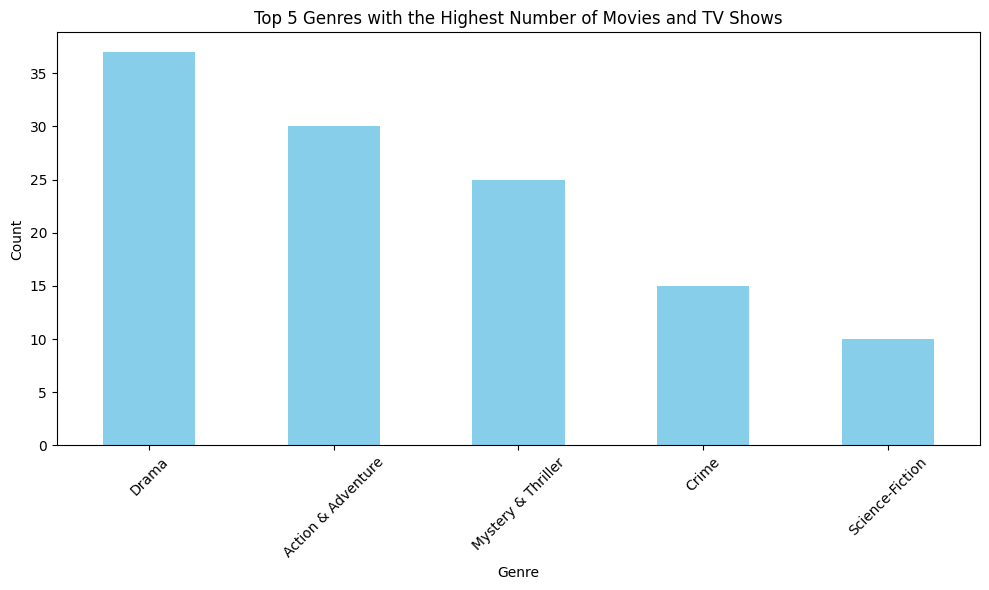

In [ ]:
import matplotlib.pyplot as plt

# Plot the top 5 genres
plt.figure(figsize=(10, 6))
top_5_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 5 Genres with the Highest Number of Movies and TV Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

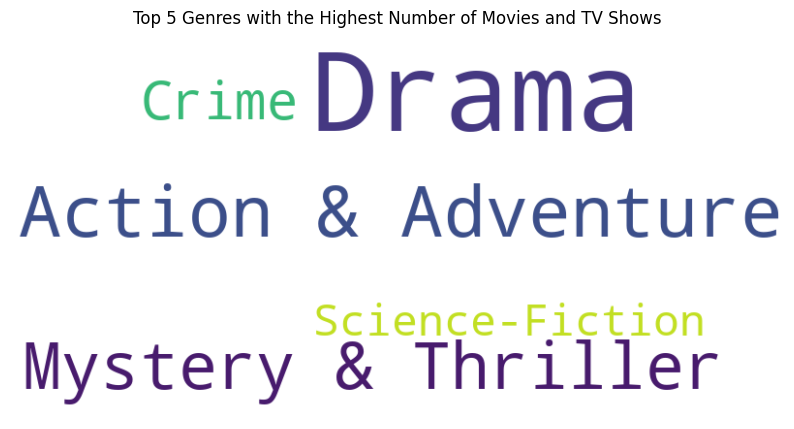

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_5_genres)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 5 Genres with the Highest Number of Movies and TV Shows')
plt.show()


## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
df1['Streaming Service'] = df1['Movie Streaming Service']
df2['Streaming Service'] =df2['streaming service']
combined_data = pd.concat([df1[['Streaming Service']],
                          df2[['Streaming Service']]])

# Group the data by the 'Streaming Service' column and count the occurrences of each streaming service
service_counts = combined_data['Streaming Service'].value_counts()

# Find the streaming service with the most number of offerings
# most_offering_service = service_counts.idxmax()
# count_of_most_offering_service = service_counts.max()
service_counts = combined_data['Streaming Service'].value_counts()

# print("Streaming service with the most number of offerings:")
# print(f"{most_offering_service} - {count_of_most_offering_service} offerings")
# Convert the series to a DataFrame
service_counts_df = service_counts.reset_index()
service_counts_df.columns = ['Streaming Service', 'Number of Offerings']

print("Streaming services with the number of offerings:")
print(service_counts_df)

Streaming services with the number of offerings:
     Streaming Service  Number of Offerings
0              Netflix                   38
1   Amazon Prime Video                   28
2   Provider not found                   21
3              Hotstar                   16
4             Apple TV                   14
5           Jio Cinema                    7
6             Sony Liv                    5
7       Lionsgate Play                    4
8          Crunchyroll                    4
9                 Voot                    4
10       Apple TV Plus                    4
11          Bookmyshow                    4
12                Zee5                    4
13        Amazon Video                    2
14           MX Player                    2
15             Sun Nxt                    1
16          Alt Balaji                    1
17       Amazon miniTV                    1


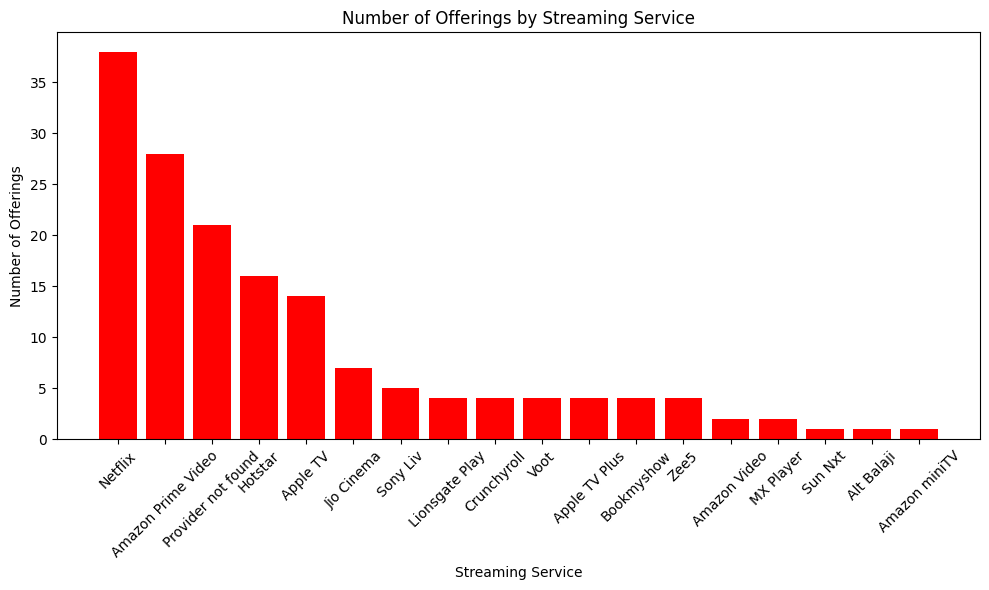

In [ ]:
import matplotlib.pyplot as plt

# Plot the streaming services with the number of offerings
plt.figure(figsize=(10, 6))
plt.bar(service_counts_df['Streaming Service'], service_counts_df['Number of Offerings'], color='red')
plt.xlabel('Streaming Service')
plt.ylabel('Number of Offerings')
plt.title('Number of Offerings by Streaming Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


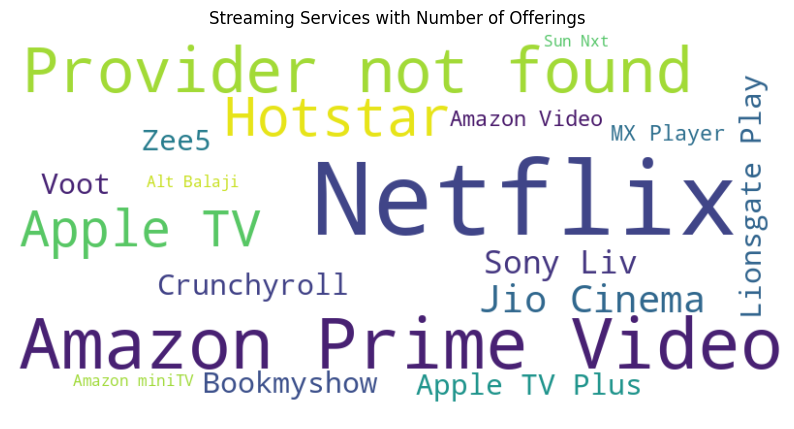

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the DataFrame to a dictionary
service_counts_dict = dict(zip(service_counts_df['Streaming Service'], service_counts_df['Number of Offerings']))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(service_counts_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Streaming Services with Number of Offerings')
plt.show()


## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
#saving a scrapped movie data to csv file
Movies_data.to_csv("Movies_Data.csv", index=False)

#saving a scrapped Tv data to csv file
Tv_data.to_csv("Tv_Show_Data.csv", index=False)

In [ ]:
#saving filter data as Filter Data in csv format
#saving a filtered movies data to csv file
movie_data_filtered.to_csv("Movies_filtered_data.csv", index=False)

#saving a filtered Tv data to csv file
Tv_data_filtered.to_csv("Tv_filttered_data.csv", index=False)

# **Dataset Drive Link (View Access with Anyone) -** https://drive.google.com/drive/folders/1LS9-du5o6tZRGaipWBaIJBTrgIWAhXp_?usp=drive_link

# ***Congratulations!!! You have completed your Assignment.***